<a href="https://colab.research.google.com/github/2303A52487/Explainable-AI/blob/main/EXP_AI_LAB_EXAM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
df = pd.read_csv("/content/Mosquito.csv")

# Display the first few rows
print("Original Data:\n", df.head())

# -----------------------------
# 1️⃣ Min-Max Normalization
# -----------------------------
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df.select_dtypes(include=['float64', 'int64'])),
                         columns=df.select_dtypes(include=['float64', 'int64']).columns)

print("\nAfter Min-Max Normalization:\n", df_minmax.head())

# -----------------------------
# 2️⃣ Z-Score Normalization (Standardization)
# -----------------------------
zscore_scaler = StandardScaler()
df_zscore = pd.DataFrame(zscore_scaler.fit_transform(df.select_dtypes(include=['float64', 'int64'])),
                         columns=df.select_dtypes(include=['float64', 'int64']).columns)

print("\nAfter Z-Score (Standardization):\n", df_zscore.head())

# -----------------------------
# Save the preprocessed data
# -----------------------------
df_minmax.to_csv("/content/MinMax_Normalized.csv", index=False)
df_zscore.to_csv("/content/ZScore_Standardized.csv", index=False)

print("\n✅ Files saved as:")
print("MinMax_Normalized.csv")
print("ZScore_Standardized.csv")

Original Data:
      index   Breteau  Aeg_aed_index  Res_index  Contain_index  Larvae_index  \
0  2005-10  1.487179       0.009744   1.538462       2.324706     15.846154   
1  2005-11  2.333333       0.023333   2.111111       3.405051     38.888889   
2  2005-13  3.538462       0.008462   1.000000       5.014069      7.461538   
3  2005-14  1.000000       0.021333   0.866667       1.769701     14.133333   
4  2005-15  2.132105       0.010974   1.950287       1.894605     30.787042   

   number  travel  AMB_TEMP       CH4  ...       NOx       O3      PM10  \
0     0.0     0.0  53710.01  1191.271  ...  83933.60  44628.1  178303.0   
1     0.0     0.0  32959.51  1234.131  ...  88407.03  67071.7  277692.0   
2     0.0     0.0  57583.59  1124.966  ...  68874.95  52936.8  142121.0   
3     1.0     0.0  54008.64  1189.927  ...  50068.45  56204.5  169800.0   
4     0.0     0.0  55734.13  1238.939  ...  72074.60  70654.8  201684.0   

      PM2.5  RAINFALL         RH      SO2       THC    UVB

In [4]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Mosquito.csv")

# Display initial information
print("Original Data Info:")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

# --------------------------------
# 1️⃣ Remove rows or columns with missing values
# --------------------------------

# Remove rows with any missing value
df_drop_rows = df.dropna()

# Remove columns with any missing value
df_drop_cols = df.dropna(axis=1)

print("\n✅ After Removing Rows with Missing Values:", df_drop_rows.shape)
print("✅ After Removing Columns with Missing Values:", df_drop_cols.shape)

# --------------------------------
# 2️⃣ Imputation Techniques
# --------------------------------

# Mean Imputation (for numerical columns)
df_mean_imputed = df.copy()
df_mean_imputed.fillna(df_mean_imputed.mean(numeric_only=True), inplace=True)

# Median Imputation (for numerical columns)
df_median_imputed = df.copy()
df_median_imputed.fillna(df_median_imputed.median(numeric_only=True), inplace=True)

# Mode Imputation (for categorical or numerical columns)
df_mode_imputed = df.copy()
for column in df_mode_imputed.columns:
    df_mode_imputed[column].fillna(df_mode_imputed[column].mode()[0], inplace=True)

# --------------------------------
# Save all versions for reference
# --------------------------------
df_drop_rows.to_csv("/content/Removed_Rows.csv", index=False)
df_drop_cols.to_csv("/content/Removed_Columns.csv", index=False)
df_mean_imputed.to_csv("/content/Mean_Imputed.csv", index=False)
df_median_imputed.to_csv("/content/Median_Imputed.csv", index=False)
df_mode_imputed.to_csv("/content/Mode_Imputed.csv", index=False)

print("\n✅ Files saved as:")
print("Removed_Rows.csv")
print("Removed_Columns.csv")
print("Mean_Imputed.csv")
print("Median_Imputed.csv")
print("Mode_Imputed.csv")

Original Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          365 non-null    object 
 1   Breteau        365 non-null    float64
 2   Aeg_aed_index  365 non-null    float64
 3   Res_index      365 non-null    float64
 4   Contain_index  365 non-null    float64
 5   Larvae_index   365 non-null    float64
 6   number         365 non-null    float64
 7   travel         365 non-null    float64
 8   AMB_TEMP       365 non-null    float64
 9   CH4            365 non-null    float64
 10  CO             365 non-null    float64
 11  NMHC           365 non-null    float64
 12  NO             365 non-null    float64
 13  NO2            365 non-null    float64
 14  NOx            365 non-null    float64
 15  O3             365 non-null    float64
 16  PM10           365 non-null    float64
 17  PM2.5          365 non-null    flo

/tmp/ipython-input-2464415425.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mode_imputed[column].fillna(df_mode_imputed[column].mode()[0], inplace=True)


In [10]:
# Import necessary libraries
import pandas as pd
from imblearn.over_sampling import SMOTE # Removed ADASYN
from collections import Counter

# Load the dataset
df = pd.read_csv("/content/Mosquito.csv")

# 🔹 Set your actual target column
target_column = 'number'   # Change this if your target is a different column

# Separate features (X) and target (y)
X = df.drop(columns=[target_column, 'index']) # Exclude 'index' column
y = df[target_column]

print("Original class distribution:", Counter(y))

# Identify minority classes with only one sample
class_counts = Counter(y)
minority_classes_to_exclude = [cls for cls, count in class_counts.items() if count <= 3]

if minority_classes_to_exclude:
    print(f"\nExcluding classes with 3 or fewer samples from oversampling: {minority_classes_to_exclude}")
    # Create masks to exclude these classes from X and y
    mask = ~y.isin(minority_classes_to_exclude)
    X_filtered = X[mask]
    y_filtered = y[mask]
else:
    X_filtered = X
    y_filtered = y


# -----------------------------
# 1️⃣ SMOTE (Synthetic Minority Oversampling Technique)
# -----------------------------
# Apply SMOTE only to the filtered data
if len(y_filtered) > 0:
    smote = SMOTE(random_state=42, k_neighbors=3)
    X_smote, y_smote = smote.fit_resample(X_filtered, y_filtered)
    print("\nAfter SMOTE oversampling (excluding small classes):", Counter(y_smote))
else:
    X_smote = X_filtered
    y_smote = y_filtered
    print("\nNo data left for SMOTE after excluding small classes.")


# -----------------------------
# Removed ADASYN section due to error
# -----------------------------


# -----------------------------
# Save balanced datasets
# -----------------------------
if len(y_smote) > 0:
    df_smote = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.Series(y_smote, name=target_column)], axis=1)
    df_smote.to_csv("/content/SMOTE_Balanced.csv", index=False)
    print("\n✅ File saved as: SMOTE_Balanced.csv")
else:
    print("\n❌ SMOTE_Balanced.csv not saved as no data was processed.")

# Removed ADASYN file saving
# if len(y_adasyn) > 0:
#     df_adasyn = pd.concat([pd.DataFrame(X_adasyn, columns=X.columns), pd.Series(y_adasyn, name=target_column)], axis=1)
#     df_adasyn.to_csv("/content/ADASYN_Balanced.csv", index=False)
#     print("✅ File saved as: ADASYN_Balanced.csv")
# else:
#      print("❌ ADASYN_Balanced.csv not saved as no data was processed.")

Original class distribution: Counter({0.0: 84, 1.0: 66, 2.0: 62, 3.0: 36, 4.0: 19, 5.0: 14, 8.0: 10, 7.0: 9, 9.0: 7, 6.0: 7, 20.0: 4, 11.0: 3, 12.0: 3, 14.0: 3, 18.0: 3, 17.0: 2, 71.0: 2, 43.0: 2, 15.0: 2, 22.0: 1, 26.0: 1, 23.0: 1, 13.0: 1, 19.0: 1, 36.0: 1, 97.0: 1, 52.0: 1, 46.0: 1, 51.0: 1, 62.0: 1, 35.0: 1, 40.0: 1, 28.0: 1, 34.0: 1, 30.0: 1, 29.0: 1, 31.0: 1, 39.0: 1, 61.0: 1, 87.0: 1, 82.0: 1, 72.0: 1, 48.0: 1, 33.0: 1, 24.0: 1, 10.0: 1})

Excluding classes with 3 or fewer samples from oversampling: [11.0, 12.0, 14.0, 17.0, 22.0, 26.0, 23.0, 18.0, 13.0, 19.0, 36.0, 97.0, 52.0, 71.0, 46.0, 51.0, 62.0, 35.0, 43.0, 40.0, 28.0, 34.0, 30.0, 15.0, 29.0, 31.0, 39.0, 61.0, 87.0, 82.0, 72.0, 48.0, 33.0, 24.0, 10.0]

After SMOTE oversampling (excluding small classes): Counter({0.0: 84, 1.0: 84, 2.0: 84, 4.0: 84, 9.0: 84, 3.0: 84, 7.0: 84, 8.0: 84, 20.0: 84, 6.0: 84, 5.0: 84})

✅ File saved as: SMOTE_Balanced.csv


Dataset preview:
      index   Breteau  Aeg_aed_index  Res_index  Contain_index  Larvae_index  \
0  2005-10  1.487179       0.009744   1.538462       2.324706     15.846154   
1  2005-11  2.333333       0.023333   2.111111       3.405051     38.888889   
2  2005-13  3.538462       0.008462   1.000000       5.014069      7.461538   
3  2005-14  1.000000       0.021333   0.866667       1.769701     14.133333   
4  2005-15  2.132105       0.010974   1.950287       1.894605     30.787042   

   number  travel  AMB_TEMP       CH4  ...       NOx       O3      PM10  \
0     0.0     0.0  53710.01  1191.271  ...  83933.60  44628.1  178303.0   
1     0.0     0.0  32959.51  1234.131  ...  88407.03  67071.7  277692.0   
2     0.0     0.0  57583.59  1124.966  ...  68874.95  52936.8  142121.0   
3     1.0     0.0  54008.64  1189.927  ...  50068.45  56204.5  169800.0   
4     0.0     0.0  55734.13  1238.939  ...  72074.60  70654.8  201684.0   

      PM2.5  RAINFALL         RH      SO2       THC    U

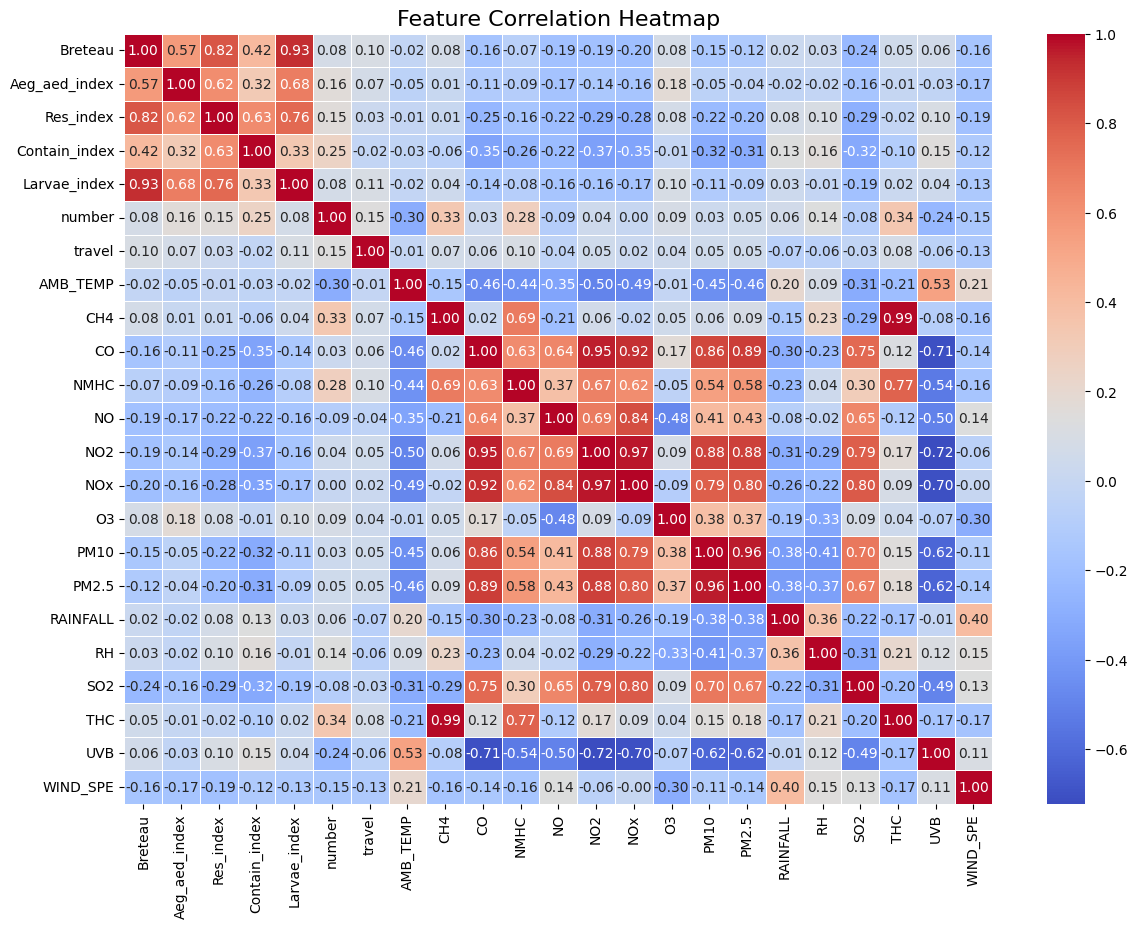


Highly correlated features (|corr| > 0.85): ['Larvae_index', 'NO2', 'NOx', 'PM10', 'PM2.5', 'THC']

✅ Dataset shape before: (365, 24)
✅ Dataset shape after removing correlated features: (365, 18)

✅ File saved as: Reduced_Correlation.csv


In [12]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("/content/Mosquito.csv")

# Display first few rows
print("Dataset preview:\n", df.head())

# -----------------------------
# 1️⃣ Compute Correlation Matrix
# -----------------------------
corr_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", corr_matrix)

# -----------------------------
# 2️⃣ Visualize using Heatmap
# -----------------------------
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

# -----------------------------
# 3️⃣ Identify Highly Correlated Features
# -----------------------------
# Take upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.85
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.85)]
print("\nHighly correlated features (|corr| > 0.85):", high_corr_features)

# -----------------------------
# 4️⃣ Remove Highly Correlated Features
# -----------------------------
df_reduced = df.drop(columns=high_corr_features)
print("\n✅ Dataset shape before:", df.shape)
print("✅ Dataset shape after removing correlated features:", df_reduced.shape)

# -----------------------------
# 5️⃣ Save the reduced dataset
# -----------------------------
df_reduced.to_csv("/content/Reduced_Correlation.csv", index=False)

print("\n✅ File saved as: Reduced_Correlation.csv")

Dataset Shape: (365, 24)
Columns: ['index', 'Breteau', 'Aeg_aed_index', 'Res_index', 'Contain_index', 'Larvae_index', 'number', 'travel', 'AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'RAINFALL', 'RH', 'SO2', 'THC', 'UVB', 'WIND_SPE']


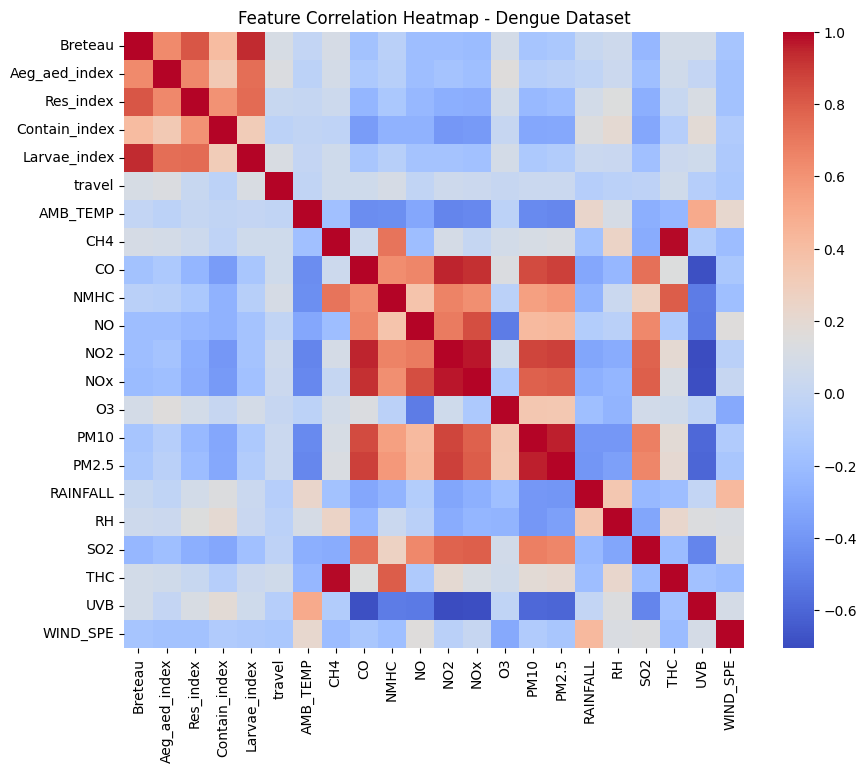

Highly correlated features removed: ['Aeg_aed_index', 'Res_index', 'Contain_index', 'Larvae_index', 'travel', 'AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'RAINFALL', 'RH', 'SO2', 'THC', 'UVB', 'WIND_SPE']


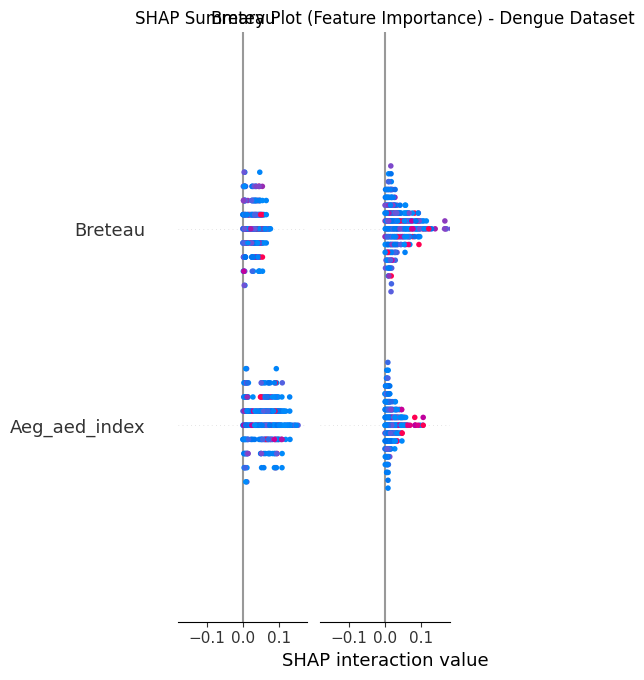

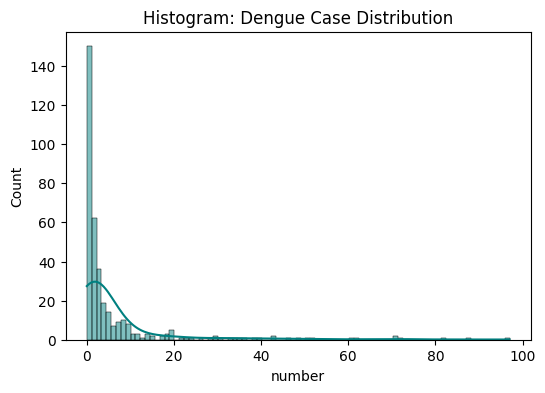

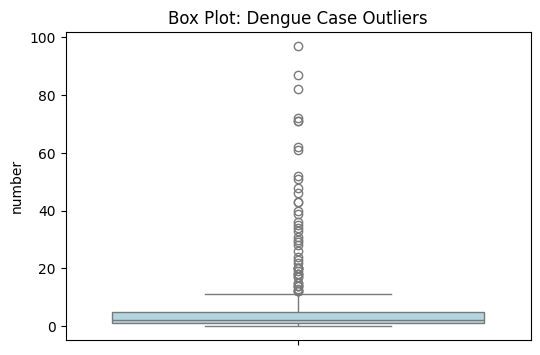

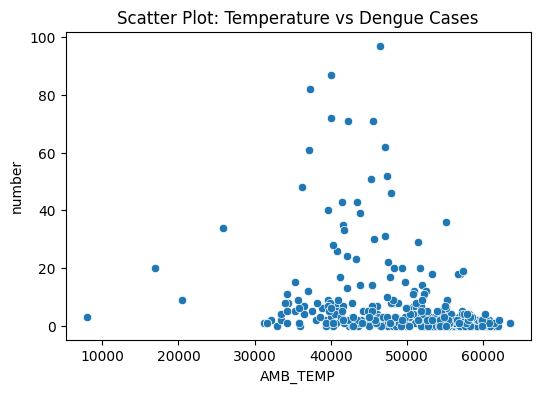

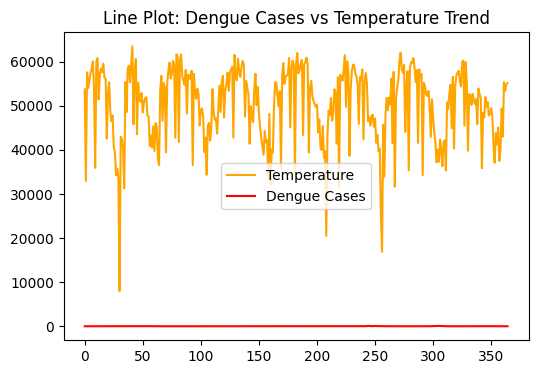

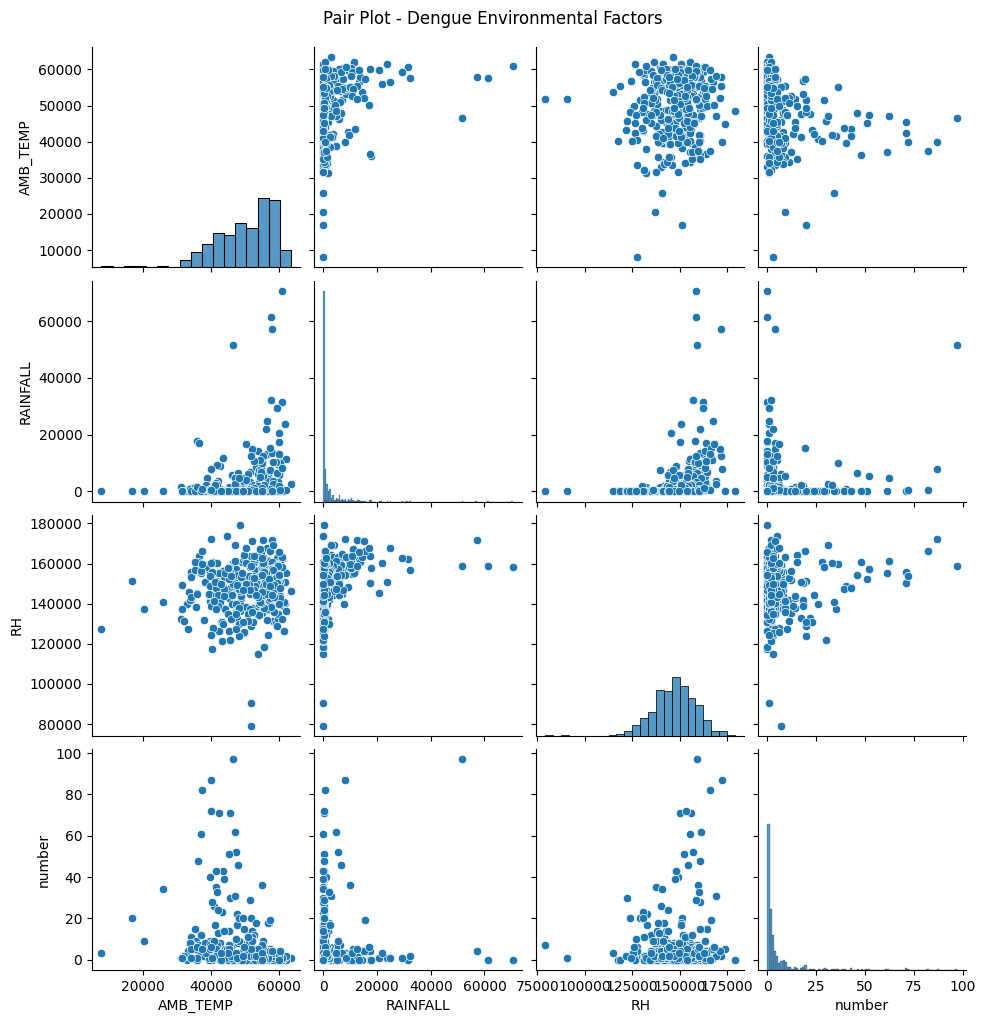

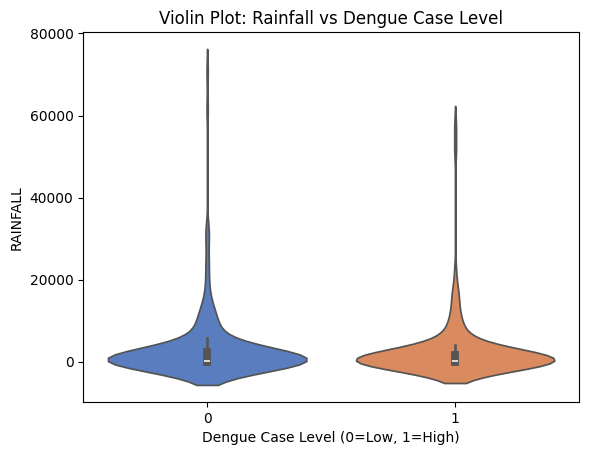


Machine Learning Results:
                  Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.780822   0.800000  0.645161  0.714286  0.822581
1        Decision Tree  0.671233   0.600000  0.677419  0.636364  0.672043
2                  KNN  0.684932   0.653846  0.548387  0.596491  0.794547
3          Naive Bayes  0.643836   0.727273  0.258065  0.380952  0.768049
4                  SVM  0.753425   0.782609  0.580645  0.666667  0.822581

Ensemble Model Results:
                Model  Accuracy  Precision    Recall  F1-Score       AUC
0            Bagging  0.753425   0.760000  0.612903  0.678571  0.797619
1      Random Forest  0.780822   0.777778  0.677419  0.724138  0.857143
2        Extra Trees  0.767123   0.791667  0.612903  0.690909  0.840246
3           AdaBoost  0.794521   0.785714  0.709677  0.745763  0.788786
4  Gradient Boosting  0.739726   0.700000  0.677419  0.688525  0.780338
5  Voting Classifier  0.739726   0.750000  0.580645  0.654545  0.85560

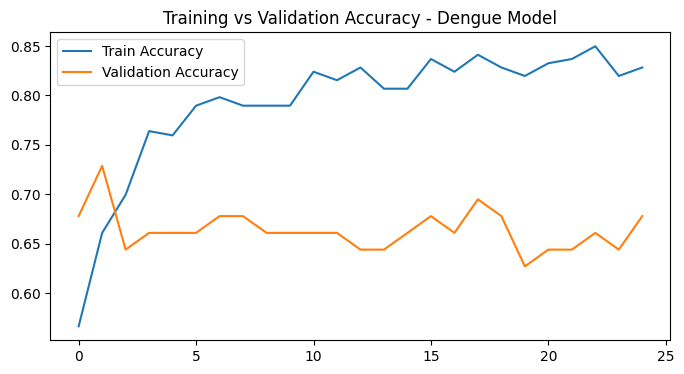

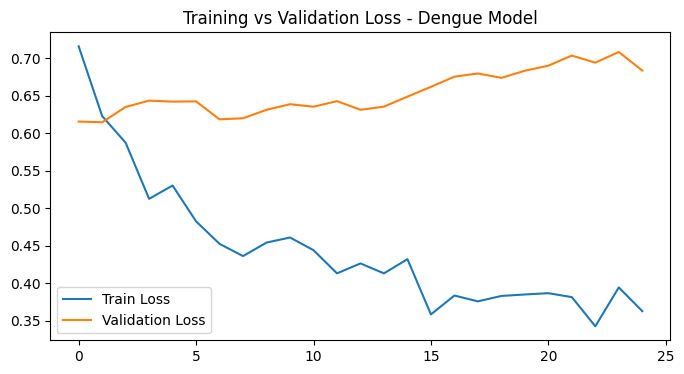

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Deep Learning Accuracy: 0.726027397260274


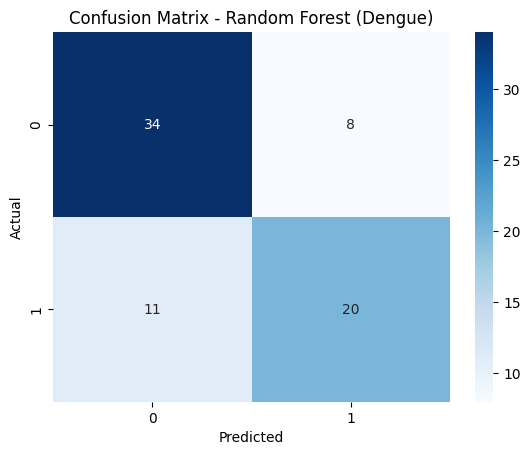

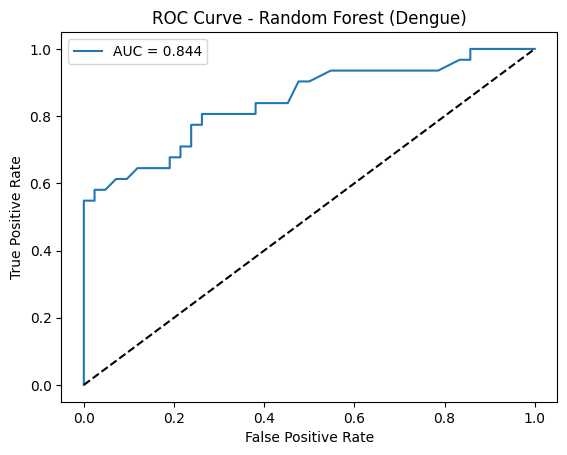

In [17]:
# =====================================
# 1️⃣ Import Required Libraries
# =====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import (
    BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,
    AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
)
import shap
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

# =====================================
# 2️⃣ Load and Preprocess Dataset
# =====================================
df = pd.read_csv("/content/Mosquito.csv")

print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Remove unwanted 'index' column if exists
if 'index' in df.columns:
    df = df.drop(columns=['index'])

# Handle missing values
df = df.fillna(df.median(numeric_only=True))

# Define target column (Dengue case count)
target_column = 'number'
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert regression target to binary classification (low vs. high dengue)
median_cases = y.median()
y = np.where(y > median_cases, 1, 0)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# =====================================
# 3️⃣ Correlation Analysis (Filter Method)
# =====================================
plt.figure(figsize=(10,8))
corr = X_train.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap - Dengue Dataset")
plt.show()

high_corr = [col for col in corr.columns if any(corr[col].abs() > 0.85) and col != corr.columns[0]]
print("Highly correlated features removed:", high_corr)

# =====================================
# 4️⃣ SHAP Feature Importance (Model-Agnostic)
# =====================================
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

# Handle binary case
if isinstance(shap_values, list):
    shap_abs = np.mean([np.abs(vals) for vals in shap_values], axis=0)
else:
    shap_abs = np.abs(shap_values)

shap.summary_plot(shap_abs, X_train, feature_names=X_train.columns, show=False)
plt.title("SHAP Summary Plot (Feature Importance) - Dengue Dataset")
plt.show()

# =====================================
# 5️⃣ Basic Data Visualization
# =====================================
plt.figure(figsize=(6,4))
sns.histplot(df[target_column], kde=True, color='teal')
plt.title("Histogram: Dengue Case Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(y=df[target_column], color='lightblue')
plt.title("Box Plot: Dengue Case Outliers")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='AMB_TEMP', y=target_column, data=df)
plt.title("Scatter Plot: Temperature vs Dengue Cases")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df['AMB_TEMP'], label='Temperature', color='orange')
plt.plot(df[target_column], label='Dengue Cases', color='red')
plt.legend()
plt.title("Line Plot: Dengue Cases vs Temperature Trend")
plt.show()

# =====================================
# 6️⃣ Advanced Visualization
# =====================================
sns.pairplot(df[['AMB_TEMP','RAINFALL','RH',target_column]])
plt.suptitle("Pair Plot - Dengue Environmental Factors", y=1.02)
plt.show()

sns.violinplot(x=y, y=df['RAINFALL'], palette='muted')
plt.title("Violin Plot: Rainfall vs Dengue Case Level")
plt.xlabel("Dengue Case Level (0=Low, 1=High)")
plt.show()

# =====================================
# 7️⃣ Machine Learning Models
# =====================================
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_prob)
    ])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
print("\nMachine Learning Results:\n", results_df)

# =====================================
# 8️⃣ Ensemble Learning Models
# =====================================
ensemble_models = {
    "Bagging": BaggingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Voting Classifier": VotingClassifier(
        estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('svc', SVC(probability=True))],
        voting='soft'
    )
}

ens_results = []
for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    ens_results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_prob)
    ])

ens_df = pd.DataFrame(ens_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
print("\nEnsemble Model Results:\n", ens_df)

# =====================================
# 9️⃣ Deep Learning Model (MLP)
# =====================================
model_dl = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_dl.fit(X_train, y_train, epochs=25, batch_size=16, validation_split=0.2, verbose=0)

# Plot Accuracy & Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy - Dengue Model")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss - Dengue Model")
plt.show()

# Evaluate
y_pred_dl = (model_dl.predict(X_test) > 0.5).astype("int32")
print("\nDeep Learning Accuracy:", accuracy_score(y_test, y_pred_dl))

# =====================================
# 🔟 Confusion Matrix + ROC Curve
# =====================================
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest (Dengue)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Dengue)")
plt.legend()
plt.show()
